# Looking at the Impact of Different Behaviors on my Sleep and Recovery
### Pat Geitner

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('./whoop_data_merged.csv')
df.sample(5)

,date,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,...,Max HR (bpm)wkt,Average HR (bpm)wkt,HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,Distance (meters),Altitude gain (meters),Altitude change (meters)
8,2022-01-14,2022-01-14 00:35:12,2022-01-15 00:39:25,UTC-05:00,93.0,51.0,136.0,NaN,NaN,14.4,...,350.0,307.0,0.0,0.0,19.0,66.0,86.0,34.71,0.00,5.88
328,2022-12-07,2022-12-07 23:24:26,2022-12-08 23:43:42,UTC-05:00,81.0,48.0,146.0,34.60,99.13,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,2022-10-12,2022-10-12 23:51:15,2022-10-14 00:12:55,UTC-04:00,48.0,59.0,121.0,34.80,96.63,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2022-05-07,2022-05-07 00:53:21,2022-05-08 03:51:53,UTC-04:00,58.0,58.0,105.0,34.33,94.96,19.0,...,624.0,493.0,37.0,96.0,117.0,99.0,36.0,4200.67,20.00,5.90
203,2022-07-31,2022-07-31 23:32:33,2022-08-01 23:45:48,UTC-07:00,94.0,47.0,155.0,34.95,96.56,14.2,...,202.0,162.0,3.0,0.0,2.0,21.0,41.0,4115.60,46.62,1.06


## Plotting some general trends in my HRV, RHR, and Sleep Duration Over Time

/var/folders/0h/y5d1d7vs2lq_lbjt1p8zk7d80000gn/T/ipykernel_22982/1842611240.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, len(df)], [df['Heart rate variability (ms)'].max(), df['Heart rate variability (ms)'].max()], 'r--', color='green')


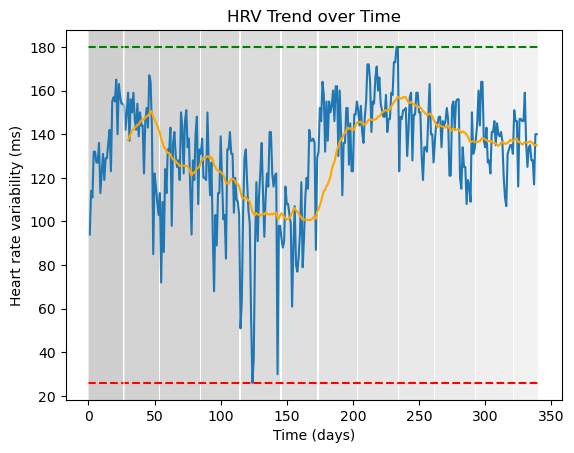

In [132]:
plt.plot(df['Heart rate variability (ms)'])
plt.ylabel('Heart rate variability (ms)')
plt.xlabel('Time (days)')
plt.title('HRV Trend over Time')
# plotting a line with the min and max values
plt.plot([0, len(df)], [df['Heart rate variability (ms)'].min(), df['Heart rate variability (ms)'].min()], 'r--')
plt.plot([0, len(df)], [df['Heart rate variability (ms)'].max(), df['Heart rate variability (ms)'].max()], 'r--', color='green')

# plotting the smoothed trend over time
plt.plot(df['Heart rate variability (ms)'].rolling(30).mean(), color='orange', alpha=1)

month = df['date'].astype('datetime64[ns]').dt.month
#plotting a different colored background with greyscale color palatte for each month and a black line to separate them
for i in range(1,13):
    plt.axvspan(month[month==i].index[0], month[month==i].index[-1], facecolor=(i/16, i/16, i/16), alpha=0.2)
plt.axvline(month[month==1].index[0], color='white', alpha=0.5)
plt.axvline(month[month==2].index[0], color='white', alpha=0.5)
plt.show()

/var/folders/0h/y5d1d7vs2lq_lbjt1p8zk7d80000gn/T/ipykernel_22982/1329314549.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, len(df)], [df['Resting heart rate (bpm)'].max(), df['Resting heart rate (bpm)'].max()], 'r--', color='green')


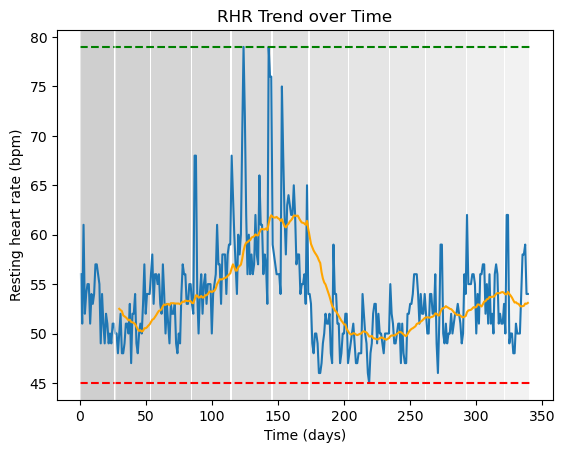

In [133]:
plt.plot(df['Resting heart rate (bpm)'])
plt.ylabel('Resting heart rate (bpm)')
plt.xlabel('Time (days)')
plt.title('RHR Trend over Time')
# plotting a line with the min and max values
plt.plot([0, len(df)], [df['Resting heart rate (bpm)'].min(), df['Resting heart rate (bpm)'].min()], 'r--')
plt.plot([0, len(df)], [df['Resting heart rate (bpm)'].max(), df['Resting heart rate (bpm)'].max()], 'r--', color='green')

# plotting the smoothed trend over time
plt.plot(df['Resting heart rate (bpm)'].rolling(30).mean(), color='orange', alpha=1)

month = df['date'].astype('datetime64[ns]').dt.month
#plotting a different colored background for each month and a black line to separate them
for i in range(1,13):
    plt.axvspan(month[month==i].index[0], month[month==i].index[-1], facecolor=(i/16, i/16, i/16), alpha=0.2)
plt.axvline(month[month==1].index[0], color='white', alpha=0.5)
plt.axvline(month[month==2].index[0], color='white', alpha=0.5)
plt.show()

/var/folders/0h/y5d1d7vs2lq_lbjt1p8zk7d80000gn/T/ipykernel_22982/2921170364.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, len(df)], [df['Asleep duration (min)'].max(), df['Asleep duration (min)'].max()], 'r--', color='green')


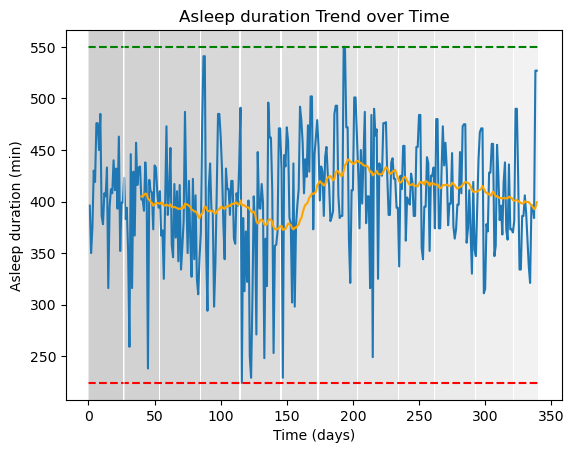

In [134]:
plt.plot(df['Asleep duration (min)'])
plt.ylabel('Asleep duration (min)')
plt.xlabel('Time (days)')
plt.title('Asleep duration Trend over Time')
plt.plot([0, len(df)], [df['Asleep duration (min)'].min(), df['Asleep duration (min)'].min()], 'r--')
plt.plot([0, len(df)], [df['Asleep duration (min)'].max(), df['Asleep duration (min)'].max()], 'r--', color='green')
plt.plot(df['Asleep duration (min)'].rolling(40).mean(), color='orange', alpha=1)
month = df['date'].astype('datetime64[ns]').dt.month
for i in range(1,13):
    plt.axvspan(month[month==i].index[0], month[month==i].index[-1], facecolor=(i/16, i/16, i/16), alpha=0.2)
plt.axvline(month[month==1].index[0], color='white', alpha=0.5)
plt.axvline(month[month==2].index[0], color='white', alpha=0.5)
plt.show()

## Investigating the average impact of different behaviors (logged in journal) on my recovery score and sleep efficiency

In [135]:
jrn_cols = ['Consume fruits and/or vegetables?',
       'Experiencing COVID-19 symptoms?', 'Feel motivated?',
       'Have any alcoholic drinks?', 'Have any caffeine?',
       'Hydrate sufficiently?', 'Listen to noise while asleep?',
       'Meditate?', 'Read (non-screened device) while in bed?',
       'Receive dose #2 of COVID-19 vaccination?', 'Share your bed?',
       'Spend time outdoors?', 'Spend time stretching?',
       'Take a multivitamin?', 'Travel on a plane?',
       'View a screened device while in bed?', 'Work from home?', 'Sleep efficiency %', 'Recovery score %']

dfbh = df[jrn_cols]
dfbh.shape

(341, 19)

In [136]:
behavior_impact = {}
for col in jrn_cols:
    if col not in ['Sleep efficiency %', 'Recovery score %'] and dfbh[col].sum() > 10:
        baseline = dfbh[dfbh[col]==0][['Recovery score %', 'Sleep efficiency %']].mean()
        behavior = dfbh[dfbh[col]==1][['Recovery score %', 'Sleep efficiency %']].mean()
        impact = behavior - baseline
        behavior_impact[col] = impact.values

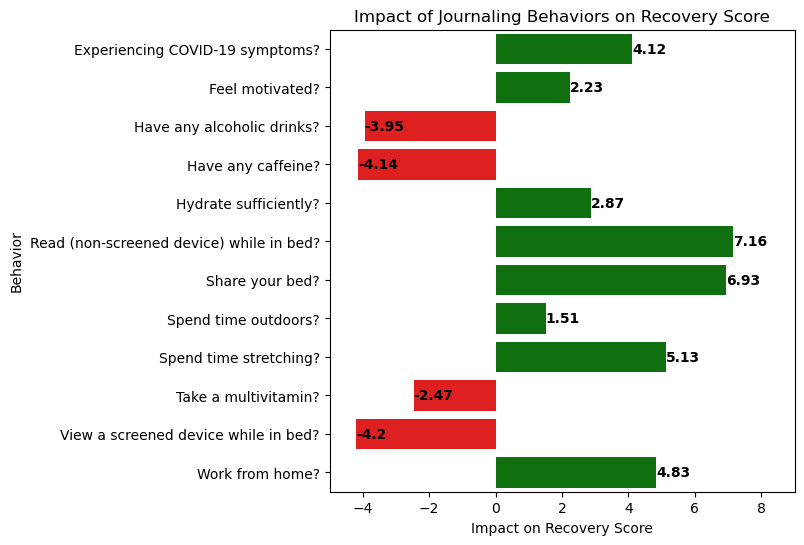

In [137]:
x = []
y = []
for k,v in list(behavior_impact.items()):
    x.append(k)
    y.append(v[0])
 
# plotting impact on recovery score as sns barplot
colors = []
for val in y:
    if val<0:
        colors.append('red')
    else:
        colors.append('green')

plt.figure(figsize=(6,6))
# plotting the barplot with values plotted on top
sns.barplot(x=y, y=x, palette=colors)
for i, v in enumerate(y):
    plt.text(v, i, str(round(v,2)), color='black', va='center', fontweight='bold')
plt.xlim(-5, 9)
plt.title('Impact of Journaling Behaviors on Recovery Score')
plt.xlabel('Impact on Recovery Score')
plt.ylabel('Behavior')
plt.show()

Interesting to note that these are slightly different than the numbers reported in my monthly performance assessment. I assume that WHOOP does something to account for the impact of other factors.

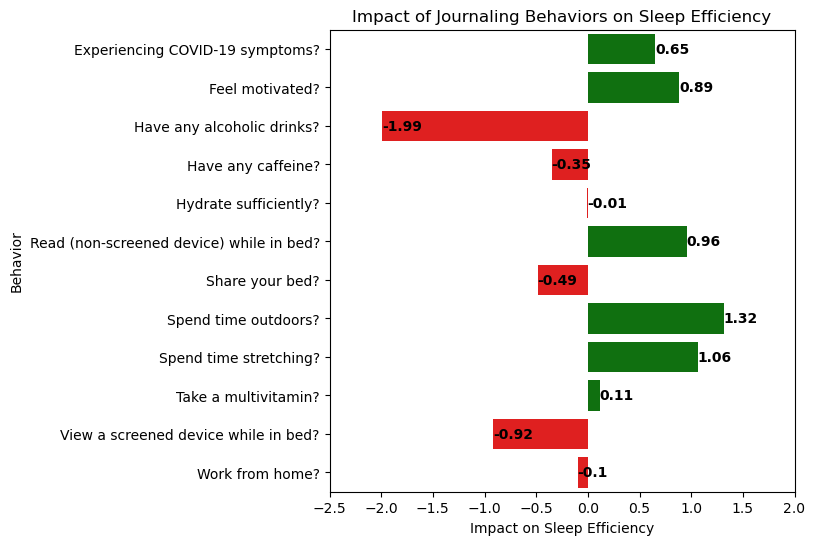

In [138]:
x = []
y = []
for k,v in list(behavior_impact.items()):
    x.append(k)
    y.append(v[1])
 
# plotting impact on recovery score as sns barplot
colors = []
for val in y:
    if val<0:
        colors.append('red')
    else:
        colors.append('green')

plt.figure(figsize=(6,6))
sns.barplot(x=y, y=x, palette=colors)
for i, v in enumerate(y):
    plt.text(v, i, str(round(v,2)), color='black', va='center', fontweight='bold')
plt.xlim(-2.5, 2)
plt.title('Impact of Journaling Behaviors on Sleep Efficiency')
plt.xlabel('Impact on Sleep Efficiency')
plt.ylabel('Behavior')
plt.show()

## Looking at the impact of some custom features that pertain to me 

In [139]:
wkt_df = pd.read_csv('./export_12_2022/workouts.csv')
presentation_dates = wkt_df[wkt_df['Activity name']=='High Stress Work']['Cycle start time'].astype('datetime64[ns]').dt.date

In [140]:
df['Sleep>7'] = df['Asleep duration (min)'].apply(lambda x: 1 if x/60>7 else 0)
df['Strain-1'] = df['Day Strain'].shift(1)
df['Prev Strain>12'] = df['Strain-1'].apply(lambda x: 1 if x>12 else 0)
df['date'] = df['date'].astype('datetime64[ns]')
df['date'] = df['date'].dt.date
for dte in presentation_dates:
    df.loc[df['date']==dte, 'presentation'] = 1
df['presentation'] = df['presentation'].fillna(0)
df['presentation_tomorrow'] = df['presentation'].shift(-1)

In [151]:
custom_cols = ['Sleep>7', 'Prev Strain>12', 'presentation_tomorrow', 'Recovery score %', 'Sleep efficiency %', 'presentation']
df_custom = df[custom_cols]
df_custom.shape

(341, 6)

In [152]:
behavior_impact = {}
for col in custom_cols:
    if col not in ['Sleep efficiency %', 'Recovery score %'] and df_custom[col].sum():
        baseline = df_custom[df_custom[col]==0][['Recovery score %', 'Sleep efficiency %']].mean()
        behavior = df_custom[df_custom[col]==1][['Recovery score %', 'Sleep efficiency %']].mean()
        impact = behavior - baseline
        behavior_impact[col] = impact.values

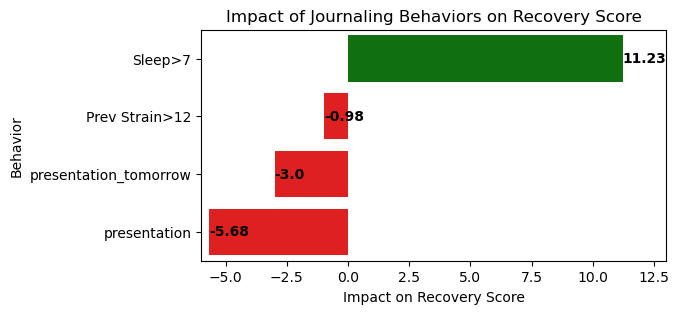

In [155]:
x = []
y = []
for k,v in list(behavior_impact.items()):
    x.append(k)
    y.append(v[0])
 
# plotting impact on recovery score as sns barplot
colors = []
for val in y:
    if val<0:
        colors.append('red')
    else:
        colors.append('green')

plt.figure(figsize=(6,3))
# plotting the barplot with values plotted on top
sns.barplot(x=y, y=x, palette=colors)
for i, v in enumerate(y):
    plt.text(v, i, str(round(v,2)), color='black', va='center', fontweight='bold')
plt.xlim(-6, 13)
plt.title('Impact of Journaling Behaviors on Recovery Score')
plt.xlabel('Impact on Recovery Score')
plt.ylabel('Behavior')
plt.show()

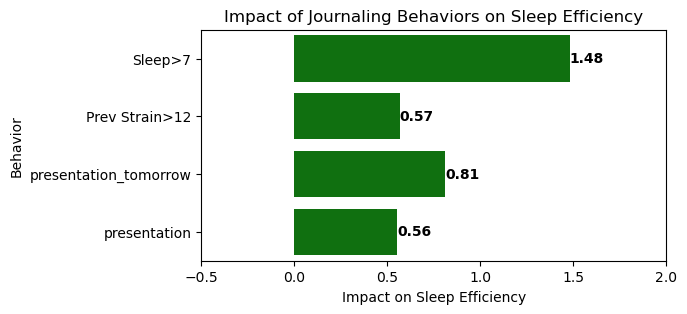

In [157]:
x = []
y = []
for k,v in list(behavior_impact.items()):
    x.append(k)
    y.append(v[1])
 
# plotting impact on recovery score as sns barplot
colors = []
for val in y:
    if val<0:
        colors.append('red')
    else:
        colors.append('green')

plt.figure(figsize=(6,3))
sns.barplot(x=y, y=x, palette=colors)
for i, v in enumerate(y):
    plt.text(v, i, str(round(v,2)), color='black', va='center', fontweight='bold')
plt.xlim(-.5, 2)
plt.title('Impact of Journaling Behaviors on Sleep Efficiency')
plt.xlabel('Impact on Sleep Efficiency')
plt.ylabel('Behavior')
plt.show()